# ANALISA OPERASIONAL TRANSJAKARTA BY Irwan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr, chi2_contingency

# Load data

df = pd.read_csv('CleanTransjakarta_Irwan.csv')


# Konversi waktu
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Hitung durasi perjalanan
df['tripDurationMinutes'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Pastikan tipe data tahun lahir  (integer)
df['payCardBirthDate'] = df['payCardBirthDate'].astype(int)

# tanggal lahir (1 Jan tahun lahir)
df['birthDate'] = pd.to_datetime(df['payCardBirthDate'].astype(str) + '-01-01')

# Tanggal sekarang (misal sekarang 2025-05-23)
now = pd.Timestamp('2025-05-27')

# Hitung umur
df['age'] = (now - df['birthDate']).dt.days // 365

# Buat kolom duration_min
df['duration_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

# Buat kolom is_weekend (hari kerja atau akhir pekan)
df['is_weekend'] = df['tapInTime'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Buat kolom age
df['age'] = 2023 - df['payCardBirthDate']

# Hitung frekuensi perjalanan per pengguna (payCardID)
freq_user = df.groupby('payCardID')['transID'].count()

# Gabungkan frekuensi ke df
df = df.merge(freq_user.rename('Freq_Per_User'), left_on='payCardID', right_index=True)

# load data
df = df.dropna(subset=['duration_min', 'is_weekend', 'age', 'payAmount', 'payCardSex', 'Freq_Per_User'])


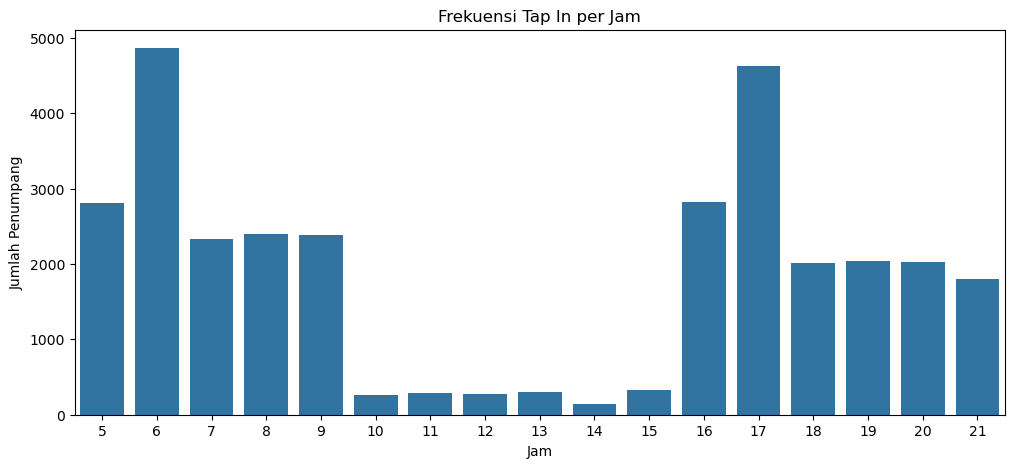

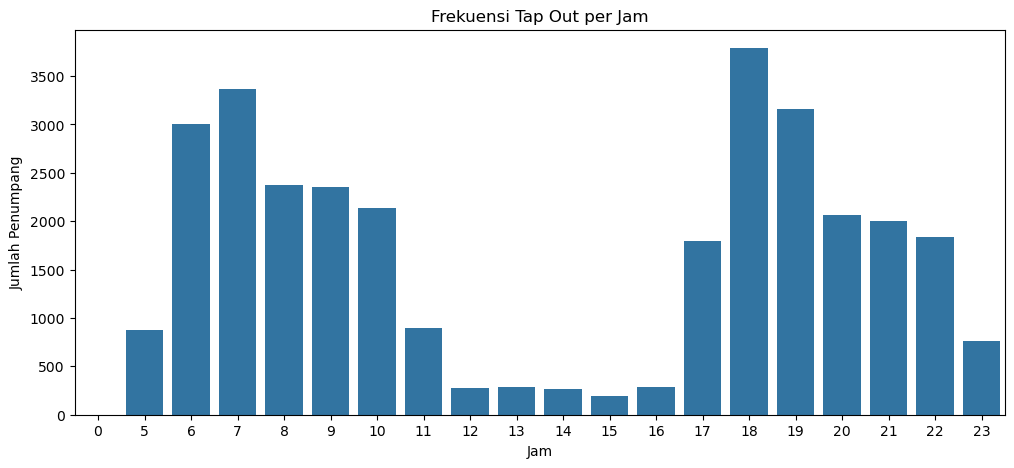

In [43]:
# Visualisasi jam sibuk (tapIn dan tapOut)
plt.figure(figsize=(12,5))
df['hourIn'] = df['tapInTime'].dt.hour
sns.countplot(x='hourIn', data=df)
plt.title('Frekuensi Tap In per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.show()

plt.figure(figsize=(12,5))
df['hourOut'] = df['tapOutTime'].dt.hour
sns.countplot(x='hourOut', data=df)
plt.title('Frekuensi Tap Out per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.show()

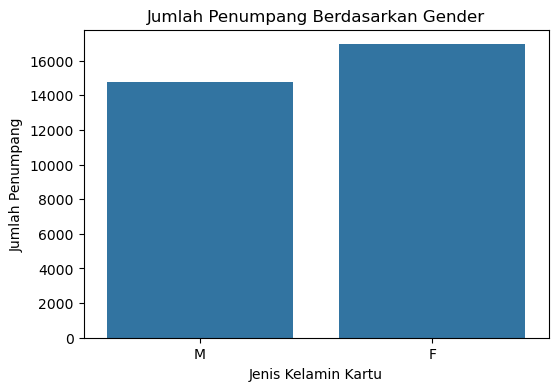

In [44]:
# visual gender 
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='payCardSex')
plt.title('Jumlah Penumpang Berdasarkan Gender')
plt.xlabel('Jenis Kelamin Kartu')
plt.ylabel('Jumlah Penumpang')
plt.show()

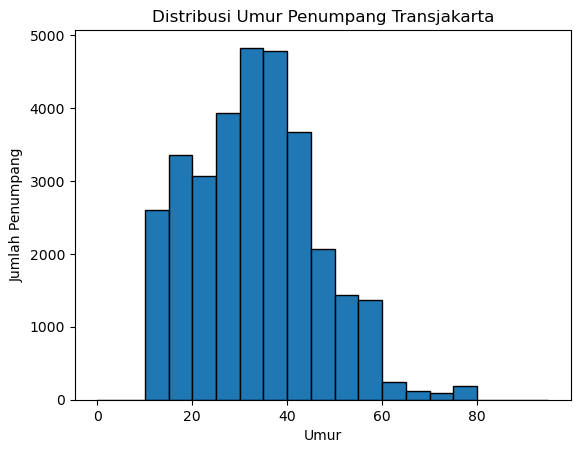

In [45]:
# visualisasi umur

plt.hist(df['age'], bins=range(0, 100, 5), edgecolor='black')
plt.title('Distribusi Umur Penumpang Transjakarta')
plt.xlabel('Umur')
plt.ylabel('Jumlah Penumpang')
plt.show()

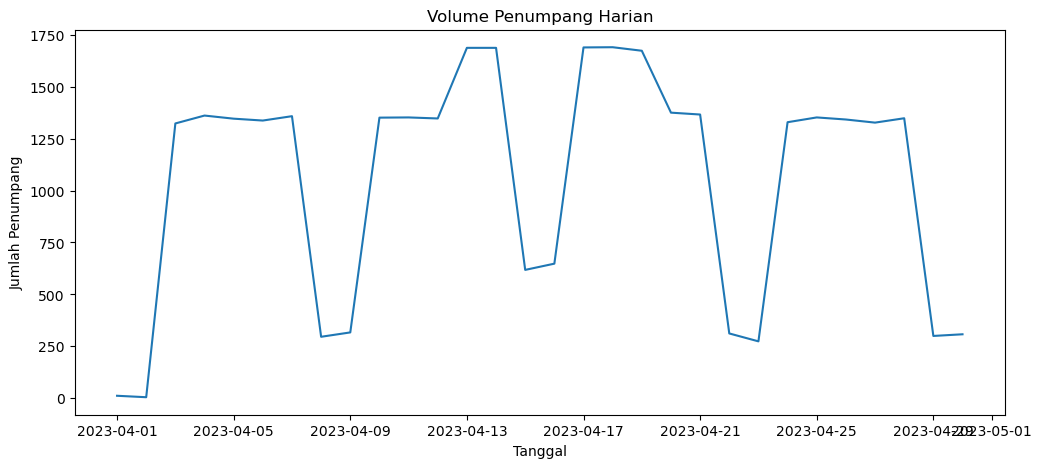

In [46]:
#  volume penumpang harian 
df['date'] = df['tapInTime'].dt.date
daily_volume = df.groupby('date').size()

plt.figure(figsize=(12,5))
daily_volume.plot()
plt.title('Volume Penumpang Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penumpang')
plt.show()


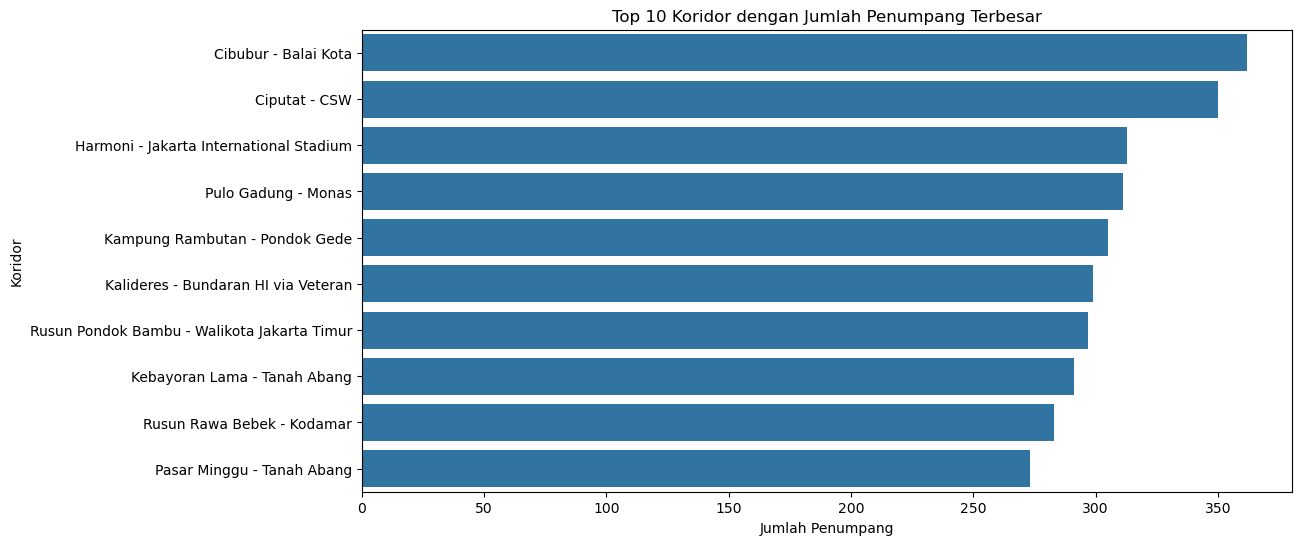

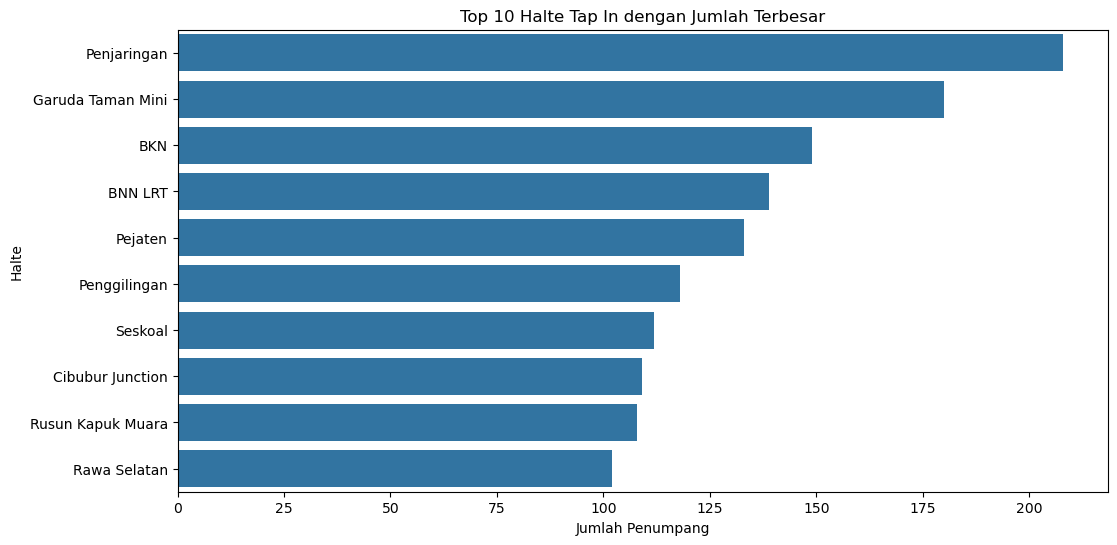

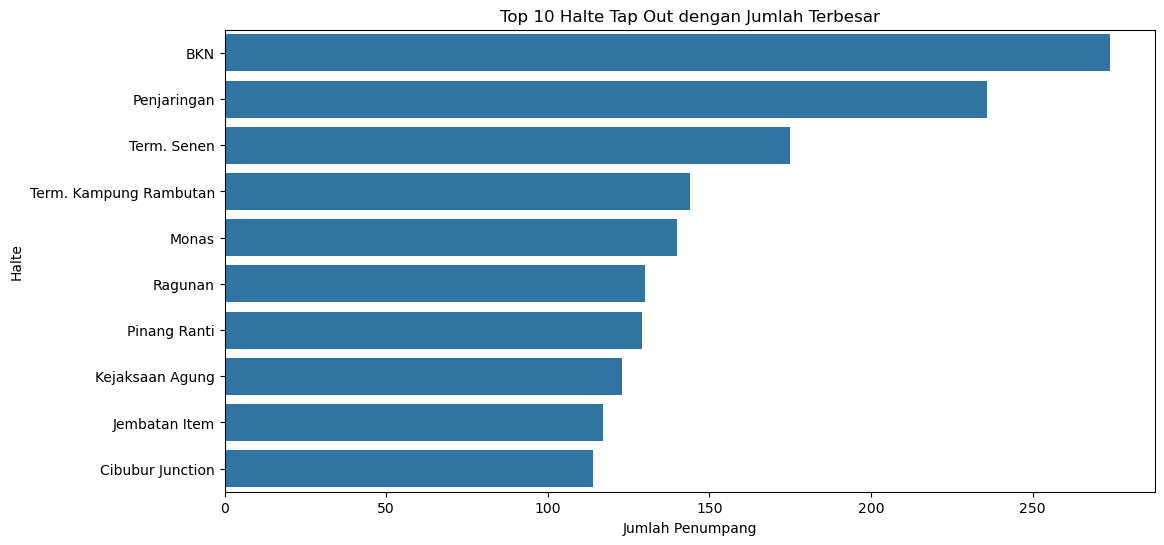

In [47]:
# Jumlah penumpang per koridor dan halte (tapIn)
top_corridors = df['corridorName'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_corridors.values, y=top_corridors.index)
plt.title('Top 10 Koridor dengan Jumlah Penumpang Terbesar')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Koridor')
plt.show()

top_tapin = df['tapInStopsName'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_tapin.values, y=top_tapin.index)
plt.title('Top 10 Halte Tap In dengan Jumlah Terbesar')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Halte')
plt.show()

# Pola tap-in dan tap-out
top_tapout = df['tapOutStopsName'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_tapout.values, y=top_tapout.index)
plt.title('Top 10 Halte Tap Out dengan Jumlah Terbesar')
plt.xlabel('Jumlah Penumpang')
plt.ylabel('Halte')
plt.show()



Top 10 Koridor dengan Durasi Perjalanan Terlama (menit):
corridorName
Kampung Rambutan - Blok M                 83.659375
Cinere - Kuningan                         82.890889
Stasiun Palmerah - Tosari                 81.617258
Rusun Pinus Elok - Rusun Pulo Gebang      81.610333
Senen - Pulo Gadung via Kelapa Gading     80.222797
Rawamangun - Klender                      80.000813
Puri Kembangan - Sentraland Cengkareng    79.724459
Grogol - Tubagus Angke                    79.714198
Pinang Ranti - Bundaran Senayan           79.413580
Kelapa Gading - Rusun Kemayoran           78.695550
Name: duration_min, dtype: float64


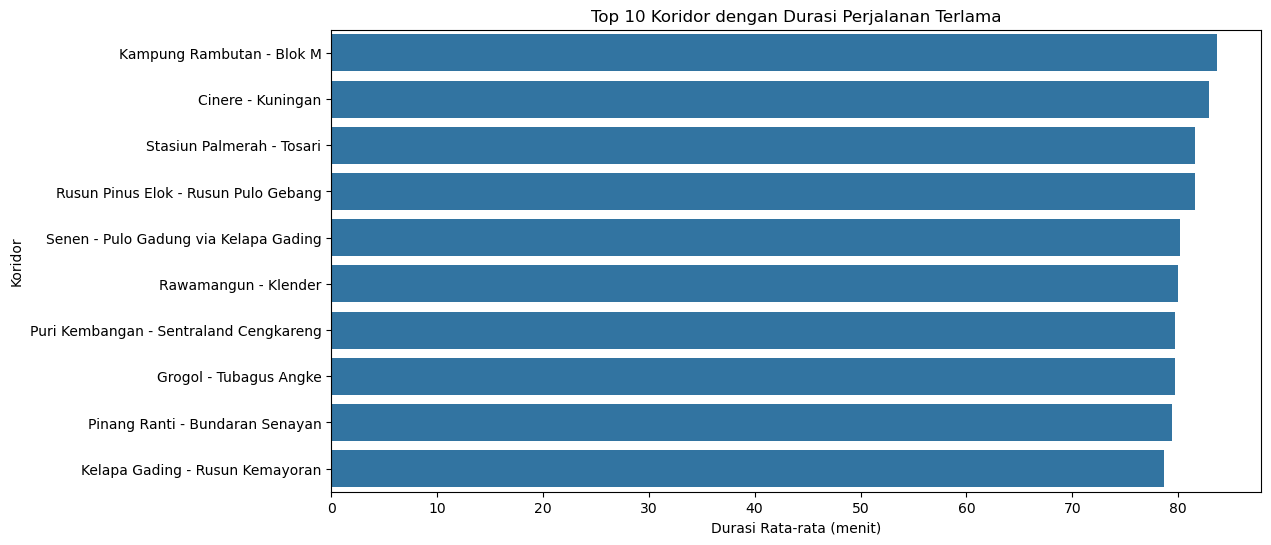

In [48]:
# Durasi perjalanan per koridor (rata-rata)
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['duration_min'] = (df['tapOutTime'] - df['tapInTime']).dt.total_seconds() / 60

koridor_duration = df.groupby('corridorName')['duration_min'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 Koridor dengan Durasi Perjalanan Terlama (menit):")
print(koridor_duration)

# Visualisasi durasi rata-rata perjalanan per koridor
plt.figure(figsize=(12,6))
sns.barplot(y=koridor_duration.index, x=koridor_duration.values, orient='h')
plt.title('Top 10 Koridor dengan Durasi Perjalanan Terlama')
plt.xlabel('Durasi Rata-rata (menit)')
plt.ylabel('Koridor')
plt.show()

count    31730.000000
mean        72.197369
std         28.071127
min         15.000000
25%         51.133333
50%         72.083333
75%         95.733333
max        179.050000
Name: tripDurationMinutes, dtype: float64


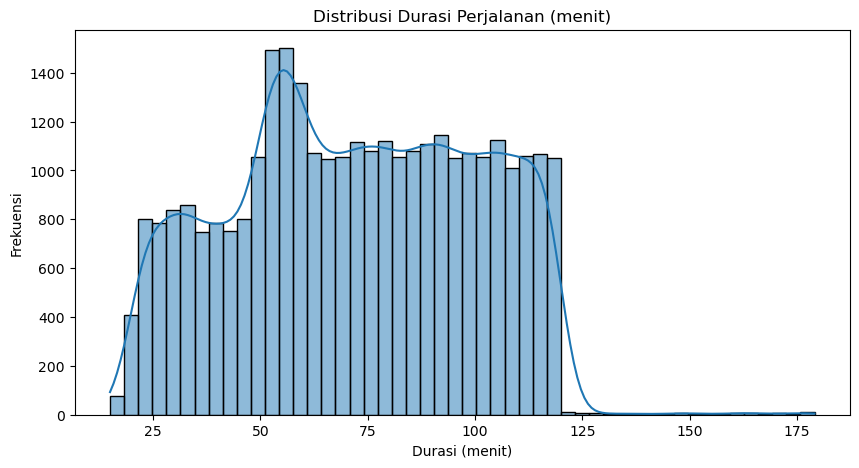

In [49]:
# Statistik durasi perjalanan dan distribusi
print(df['tripDurationMinutes'].describe())

plt.figure(figsize=(10,5))
sns.histplot(df['tripDurationMinutes'], bins=50, kde=True)
plt.title('Distribusi Durasi Perjalanan (menit)')
plt.xlabel('Durasi (menit)')
plt.ylabel('Frekuensi')
plt.show()


== 1. Analisis Perilaku Hari Kerja vs Akhir Pekan ==
Jumlah transaksi Hari Kerja: 28640
Jumlah transaksi Akhir Pekan: 3090


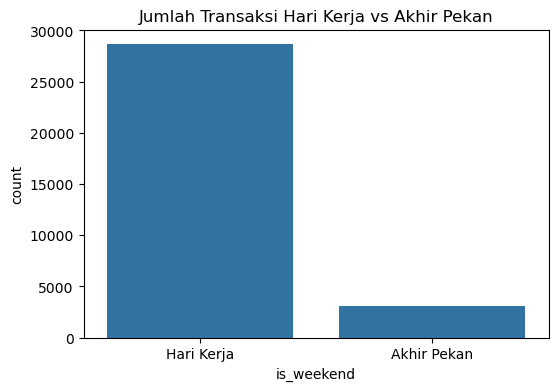


== 2. Analisis Loyalty dan Retensi Penumpang ==
Statistik frekuensi perjalanan per pengguna:
count    1924.000000
mean       16.491684
std        15.135046
min         1.000000
25%         3.000000
50%         9.000000
75%        34.000000
max        40.000000
Name: count, dtype: float64

Segmentasi pengguna berdasarkan frekuensi perjalanan:
count
Sekali                 267
Jarang (2-5)           685
Sering (6-20)          193
Sangat Sering (>20)    779
Name: count, dtype: int64


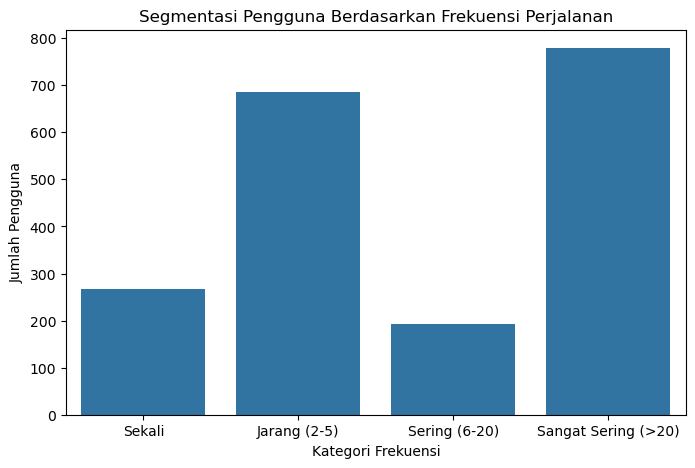

In [50]:
# datetime dan kolom isweekend
df['tapInDayOfWeek'] = df['tapInTime'].dt.dayofweek
df['is_weekend'] = df['tapInDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# ----------------------------------------
# 1. Analisis Perilaku Hari Kerja vs Akhir Pekan
# ----------------------------------------
print("== 1. Analisis Perilaku Hari Kerja vs Akhir Pekan ==")

# Jumlah penumpang
count_weekday = df[df['is_weekend'] == 0].shape[0]
count_weekend = df[df['is_weekend'] == 1].shape[0]
print(f"Jumlah transaksi Hari Kerja: {count_weekday}")
print(f"Jumlah transaksi Akhir Pekan: {count_weekend}")

# Visualisasi jumlah transaksi
plt.figure(figsize=(6,4))
sns.countplot(x='is_weekend', data=df)
plt.xticks([0,1], ['Hari Kerja', 'Akhir Pekan'])
plt.title('Jumlah Transaksi Hari Kerja vs Akhir Pekan')
plt.show()


# ----------------------------------------
# 2. Analisis Loyalty dan Retensi Penumpang
# ----------------------------------------
print("\n== 2. Analisis Loyalty dan Retensi Penumpang ==")

# Hitung frekuensi transaksi per pengguna (payCardID)
freq_user = df['payCardID'].value_counts()

# Statistik frekuensi
print("Statistik frekuensi perjalanan per pengguna:")
print(freq_user.describe())


# Segmentasi pengguna berdasarkan frekuensi perjalanan
bins = [0, 1, 5, 20, 1000]
labels = ['Sekali', 'Jarang (2-5)', 'Sering (6-20)', 'Sangat Sering (>20)']
freq_cat = pd.cut(freq_user, bins=bins, labels=labels, right=True)

freq_cat_counts = freq_cat.value_counts().sort_index()
print("\nSegmentasi pengguna berdasarkan frekuensi perjalanan:")
print(freq_cat_counts)

plt.figure(figsize=(8,5))
sns.barplot(x=freq_cat_counts.index, y=freq_cat_counts.values)
plt.title('Segmentasi Pengguna Berdasarkan Frekuensi Perjalanan')
plt.xlabel('Kategori Frekuensi')
plt.ylabel('Jumlah Pengguna')
plt.show()

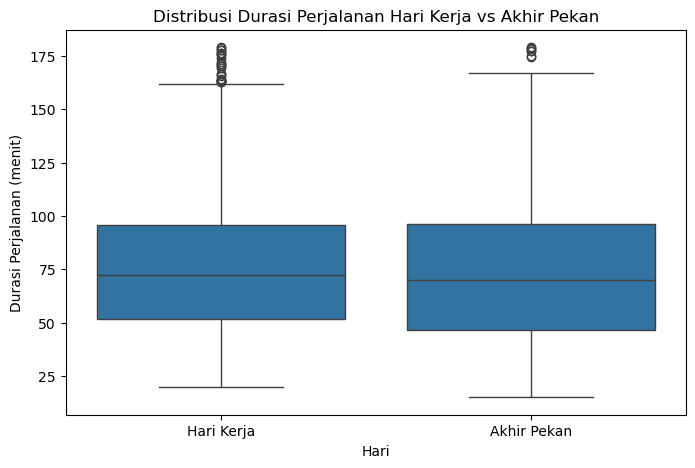

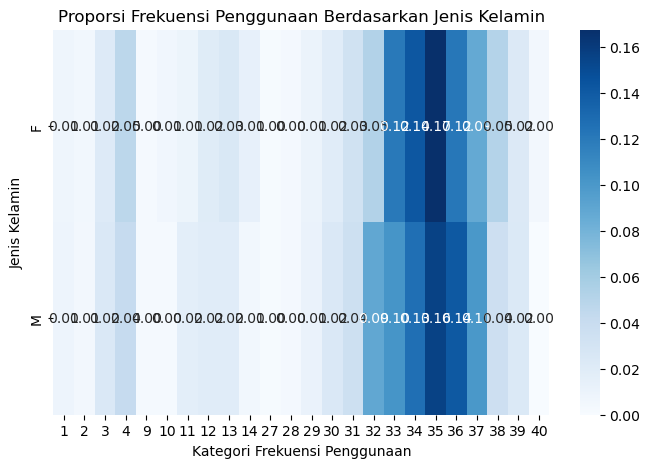

In [51]:
# 1. Visualisasi Uji T: Durasi perjalanan hari kerja vs akhir pekan
plt.figure(figsize=(8,5))
sns.boxplot(x='is_weekend', y='duration_min', data=df)
plt.title('Distribusi Durasi Perjalanan Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari')
plt.ylabel('Durasi Perjalanan (menit)')
plt.xticks([0,1], ['Hari Kerja', 'Akhir Pekan'])
plt.show()

# 2. Visualisasi Uji Chi-Square: Jenis Kelamin dan Frekuensi Penggunaan
contingency_table = pd.crosstab(df['payCardSex'], df['Freq_Per_User'])
contingency_table_norm = contingency_table.div(contingency_table.sum(axis=1), axis=0)

plt.figure(figsize=(8,5))
sns.heatmap(contingency_table_norm, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proporsi Frekuensi Penggunaan Berdasarkan Jenis Kelamin')
plt.xlabel('Kategori Frekuensi Penggunaan')
plt.ylabel('Jenis Kelamin')
plt.show()
